In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ecommerce_customer_data.csv')
df.head()

,CustomerID,Gender,Age,City,MembershipType,TotalSpend,ItemsPurchased,AverageRating,DiscountApplied,DaysSinceLastPurchase,SatisfactionLevel
0,1,Female,39,Brewerfurt,Gold,699.915464,18,3.955039,False,235,Neutral
1,2,Female,71,Roweport,Gold,2468.772829,14,3.230167,False,179,Unsatisfied
2,3,Male,25,Osborneland,Gold,4930.286054,15,3.031953,True,92,Neutral
3,4,Male,60,Kathrynport,Silver,2699.439442,10,4.692113,True,162,Satisfied
4,5,Female,37,Jessicaborough,Gold,1473.339497,15,2.509883,False,263,Unsatisfied


In [3]:
df.shape

(10000, 11)

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
City                      0
MembershipType           51
TotalSpend               35
ItemsPurchased            0
AverageRating            20
DiscountApplied           0
DaysSinceLastPurchase     0
SatisfactionLevel         0
dtype: int64

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'City', 'MembershipType', 'TotalSpend',
       'ItemsPurchased', 'AverageRating', 'DiscountApplied',
       'DaysSinceLastPurchase', 'SatisfactionLevel'],
      dtype='object')

In [6]:
df['MembershipType'].value_counts()

MembershipType
Silver    3379
Bronze    3302
Gold      3268
Name: count, dtype: int64

In [7]:
df['MembershipType'].mode()

0    Silver
Name: MembershipType, dtype: object

In [8]:
df['MembershipType'] = df['MembershipType'].fillna(df['MembershipType'].mode()[0])

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
City                      0
MembershipType            0
TotalSpend               35
ItemsPurchased            0
AverageRating            20
DiscountApplied           0
DaysSinceLastPurchase     0
SatisfactionLevel         0
dtype: int64

In [10]:
df['TotalSpend'].describe()

count    9965.000000
mean     2511.336410
std      1435.120438
min        50.166967
25%      1273.960492
50%      2494.046486
75%      3785.008344
max      4998.839534
Name: TotalSpend, dtype: float64

In [11]:
df['TotalSpend'].median()

2494.046486

In [12]:
df['TotalSpend'] = df['TotalSpend'].fillna(df['TotalSpend'].median())

In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
City                      0
MembershipType            0
TotalSpend                0
ItemsPurchased            0
AverageRating            20
DiscountApplied           0
DaysSinceLastPurchase     0
SatisfactionLevel         0
dtype: int64

In [14]:
df['AverageRating'].describe()

count    9980.000000
mean        2.995542
std         1.153585
min         1.000161
25%         1.993850
50%         3.006083
75%         3.993064
max         4.999932
Name: AverageRating, dtype: float64

In [15]:
df['AverageRating'] = df['AverageRating'].fillna(df['AverageRating'].median())

In [16]:
df.isnull().sum()

CustomerID               0
Gender                   0
Age                      0
City                     0
MembershipType           0
TotalSpend               0
ItemsPurchased           0
AverageRating            0
DiscountApplied          0
DaysSinceLastPurchase    0
SatisfactionLevel        0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
City                      object
MembershipType            object
TotalSpend               float64
ItemsPurchased             int64
AverageRating            float64
DiscountApplied             bool
DaysSinceLastPurchase      int64
SatisfactionLevel         object
dtype: object

In [19]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['CustomerID', 'Age', 'TotalSpend', 'ItemsPurchased', 'AverageRating',
       'DiscountApplied', 'DaysSinceLastPurchase'],
      dtype='object')
Index(['Gender', 'City', 'MembershipType', 'SatisfactionLevel'], dtype='object')


In [20]:
for i in cat_cols:
    print(i,df[i].nunique())

Gender 2
City 7746
MembershipType 3
SatisfactionLevel 3


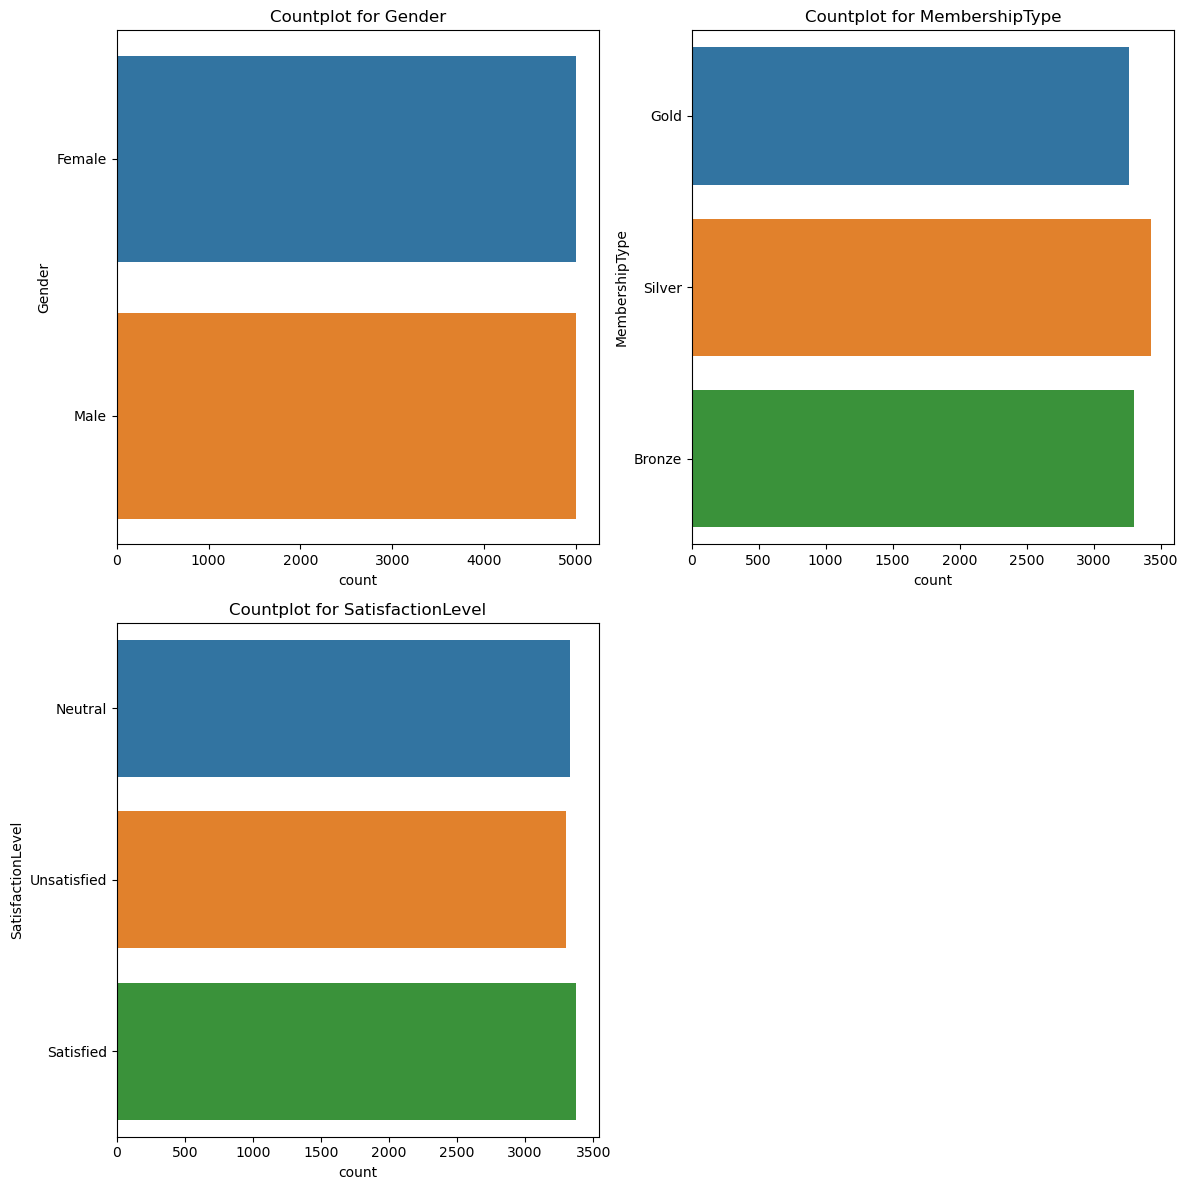

In [21]:
cols = ['Gender', 'MembershipType', 'SatisfactionLevel']

plt.figure(figsize=(12,12))
for i in range(len(cols)):  # i = 0,1,2,3,4
    plt.subplot(2,2,i+1)
    sns.countplot(y = df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

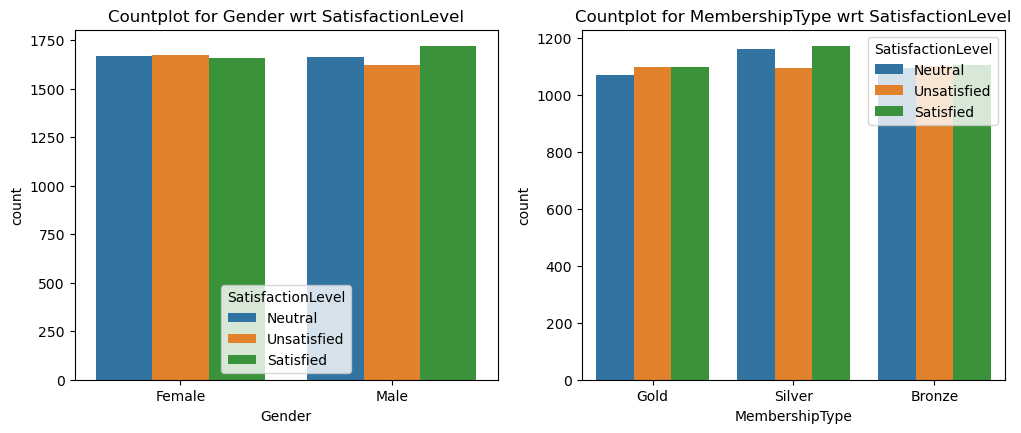

In [22]:
cols = ['Gender', 'MembershipType']
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]],hue = df['SatisfactionLevel'])
    plt.title(f'Countplot for {cols[i]} wrt SatisfactionLevel')
plt.show()

In [23]:
num_cols

Index(['CustomerID', 'Age', 'TotalSpend', 'ItemsPurchased', 'AverageRating',
       'DiscountApplied', 'DaysSinceLastPurchase'],
      dtype='object')

In [26]:
df['DiscountApplied'] = df['DiscountApplied'].replace({True:0,False:1})

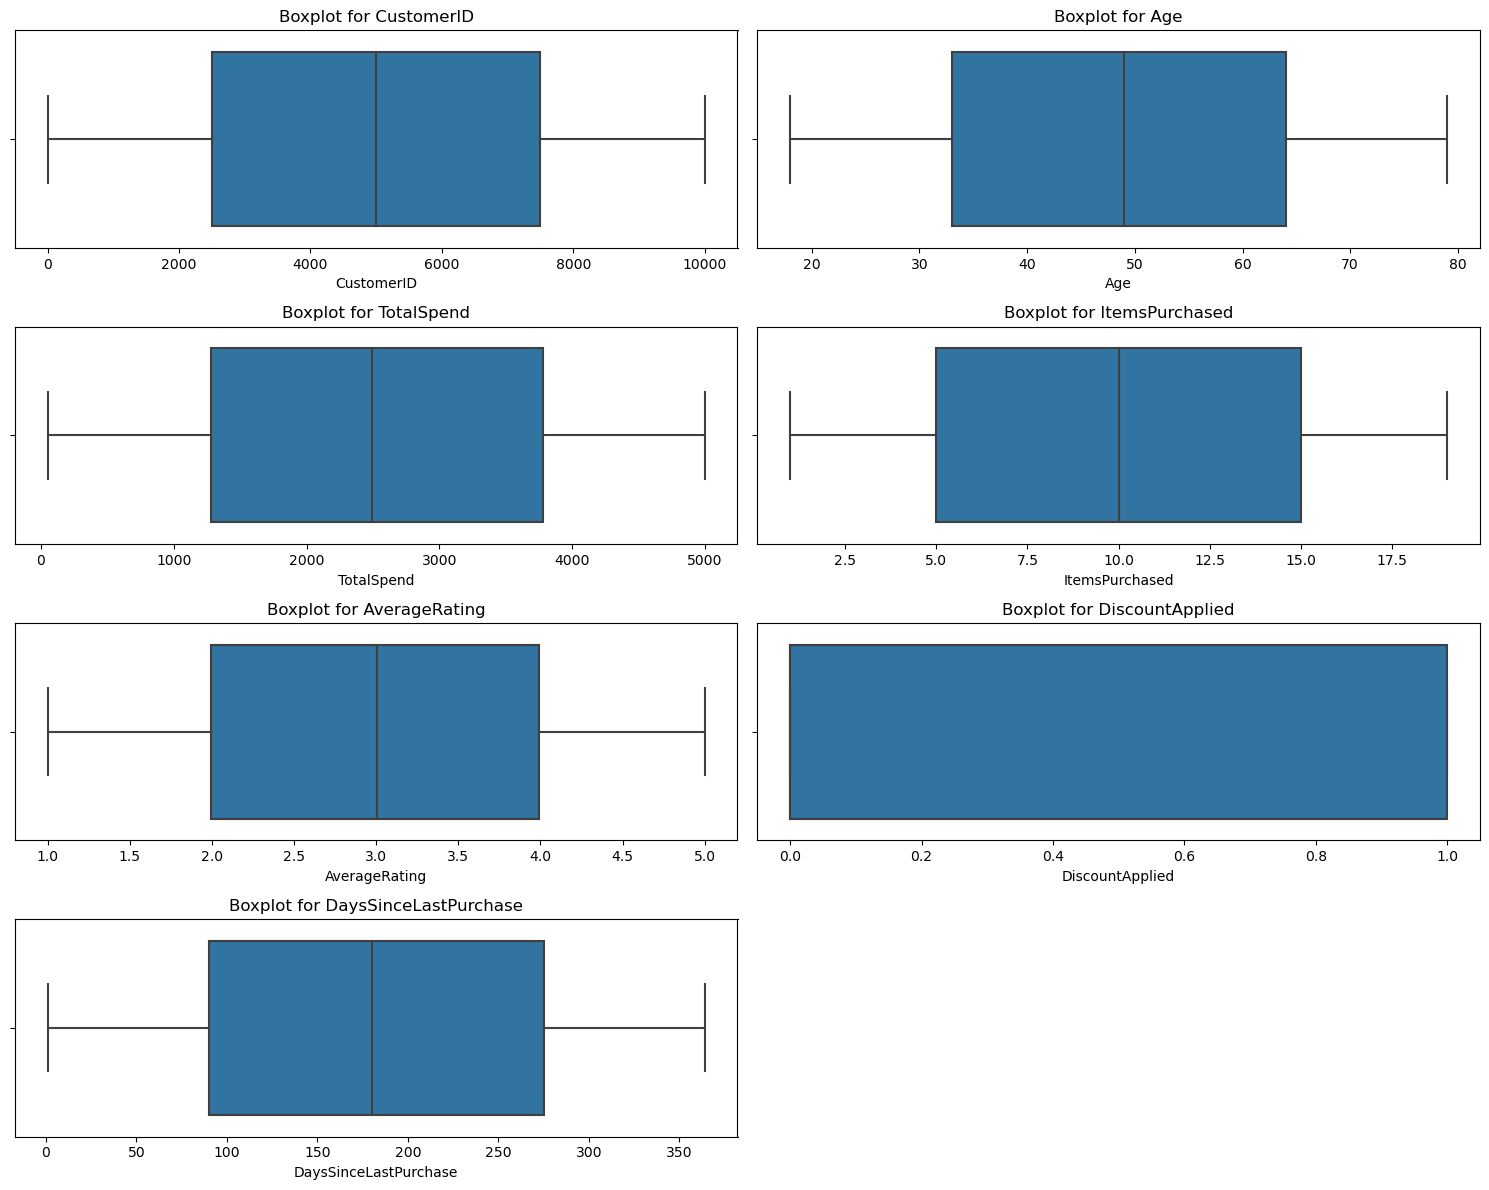

In [37]:
plt.figure(figsize=(15,12))
for i in range(len(num_cols)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')

plt.tight_layout()
plt.show()

In [38]:
num_cols = df.dtypes[df.dtypes!='object'].index
num_cols

Index(['CustomerID', 'Age', 'TotalSpend', 'ItemsPurchased', 'AverageRating',
       'DiscountApplied', 'DaysSinceLastPurchase'],
      dtype='object')

In [40]:
a = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
CustomerID,1.000000,100.990000,200.980000,500.950000,5000.500000,9500.050000,9700.030000,9800.020000,9900.010000,10000.000000
Age,18.000000,18.000000,19.000000,21.000000,49.000000,77.000000,78.000000,78.000000,79.000000,79.000000
TotalSpend,50.166967,98.424145,137.449934,271.226221,2494.046486,4738.113606,4846.455419,4888.529391,4945.935355,4998.839534
ItemsPurchased,1.000000,1.000000,1.000000,1.000000,10.000000,18.000000,19.000000,19.000000,19.000000,19.000000
AverageRating,1.000161,1.041955,1.082087,1.198841,3.006083,4.794897,4.873359,4.915415,4.957257,4.999932
DiscountApplied,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DaysSinceLastPurchase,1.000000,4.000000,8.000000,17.000000,180.000000,347.000000,354.000000,357.000000,361.000000,364.000000


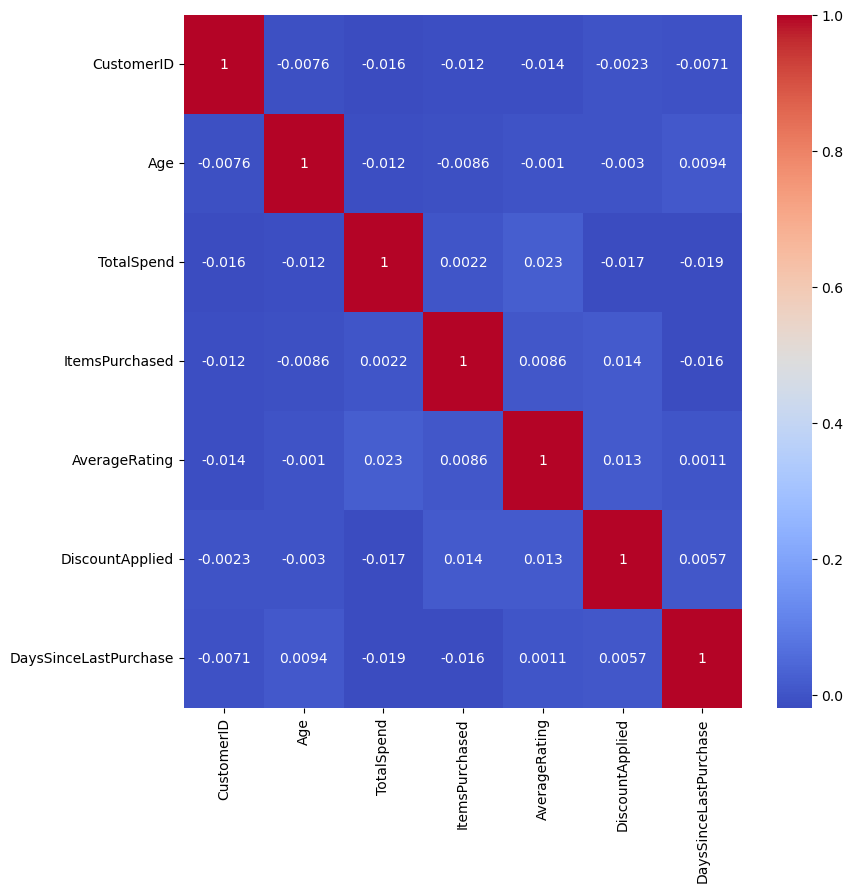

In [39]:
corr = df[num_cols].corr()

plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')  # annot = Annotation
plt.show()

In [43]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
City                      object
MembershipType            object
TotalSpend               float64
ItemsPurchased             int64
AverageRating            float64
DiscountApplied            int64
DaysSinceLastPurchase      int64
SatisfactionLevel         object
dtype: object

In [44]:
cat_cols

Index(['Gender', 'City', 'MembershipType', 'SatisfactionLevel'], dtype='object')

In [50]:
cols = ['Gender', 'MembershipType']

df_dum = pd.get_dummies(data=df,columns = cols, drop_first=True,dtype=int)
print(df_dum.shape)
print(df_dum.columns)

(10000, 12)
Index(['CustomerID', 'Age', 'City', 'TotalSpend', 'ItemsPurchased',
       'AverageRating', 'DiscountApplied', 'DaysSinceLastPurchase',
       'SatisfactionLevel', 'Gender_Male', 'MembershipType_Gold',
       'MembershipType_Silver'],
      dtype='object')


In [51]:
df_dum.dtypes

CustomerID                 int64
Age                        int64
City                      object
TotalSpend               float64
ItemsPurchased             int64
AverageRating            float64
DiscountApplied            int64
DaysSinceLastPurchase      int64
SatisfactionLevel         object
Gender_Male                int32
MembershipType_Gold        int32
MembershipType_Silver      int32
dtype: object

select x and y

In [66]:
df_dum['SatisfactionLevel'] = df_dum['SatisfactionLevel'].replace({'Satisfied':1,'Neutral':2,'Unsatisfied':3})

In [67]:
x = df_dum.drop(['SatisfactionLevel','CustomerID','City'],axis=1)
y = df_dum['SatisfactionLevel']
print(x.shape)
print(y.shape)

(10000, 9)
(10000,)


In [68]:
y.value_counts()

SatisfactionLevel
1    3375
2    3328
3    3297
Name: count, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 9)
(3000, 9)
(7000,)
(3000,)


Assumption Check: Multicollinearity(VIF)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Feature,VIF
0,Age,6.206496
3,AverageRating,6.019194
2,ItemsPurchased,3.838151
1,TotalSpend,3.631302
5,DaysSinceLastPurchase,3.533764
6,Gender_Male,1.936817
8,MembershipType_Silver,1.934717
4,DiscountApplied,1.898083
7,MembershipType_Gold,1.891057


In [72]:
from sklearn.metrics import *

In [73]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print(classification_report(y_test,ypred))
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    res = pd.DataFrame({'Train_Acc':train_acc,'test_Acc':test_acc
                       },index=[mname])
    return res, ypred

LogReg Model

In [74]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr1 = LogisticRegression(max_iter=1000)
lr1_res, ypred_lr1 = eval_model(lr1,x_train,x_test,y_train,y_test,'LogReg1')
lr1_res

              precision    recall  f1-score   support

           1       0.36      0.38      0.37      1045
           2       0.34      0.36      0.35       987
           3       0.32      0.28      0.30       968

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



,Train_Acc,test_Acc
LogReg1,0.347,0.341667


In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt1 = DecisionTreeClassifier()
dt1_res, ypred_dt1 = eval_model(dt1,x_train,x_test,y_train,y_test,'DT')
dt1_res

              precision    recall  f1-score   support

           1       0.34      0.35      0.35      1045
           2       0.34      0.33      0.33       987
           3       0.30      0.30      0.30       968

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000



,Train_Acc,test_Acc
DT,1.0,0.327667


In [85]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf1 = RandomForestClassifier()
rf1_res, ypred_rf1 = eval_model(rf1,x_train,x_test,y_train,y_test,'RF')
rf1_res

              precision    recall  f1-score   support

           1       0.36      0.37      0.36      1045
           2       0.33      0.33      0.33       987
           3       0.33      0.32      0.33       968

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



,Train_Acc,test_Acc
RF,1.0,0.339667


In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
ada1 = AdaBoostClassifier()
ada1_res, ypred_ada1 = eval_model(ada1,x_train,x_test,y_train,y_test,'RF')
ada1_res

              precision    recall  f1-score   support

           1       0.34      0.35      0.34      1045
           2       0.34      0.33      0.33       987
           3       0.31      0.31      0.31       968

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000



,Train_Acc,test_Acc
RF,0.379714,0.328667


In [90]:
y_pred = ada1.predict(x_test)

In [91]:
y_pred

array([2, 3, 3, ..., 1, 3, 1], dtype=int64)